# Impoting the Required Library 

In [63]:
import os
import random
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.image import imread
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import torch
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

# Unzipping the zipped Folder 

In [64]:
# Unzipping function
def unzip(file, destination):
    print('Unzipping to', destination)
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall(destination)

# Setting paths
base_dir = "/kaggle/tmp/"
train_images_path = os.path.join(base_dir, "images_training_rev1")
test_images_path = os.path.join(base_dir, "images_test_rev1")

# Unzip files if necessary
if not os.path.exists(base_dir):
    unzip('/kaggle/input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip', base_dir)
    unzip('/kaggle/input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip', base_dir)
    unzip('/kaggle/input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip', base_dir)

for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames[:2]:
        print(os.path.join(dirname, filename))

/kaggle/tmp/training_solutions_rev1.csv
/kaggle/tmp/images_training_rev1/316396.jpg
/kaggle/tmp/images_training_rev1/309407.jpg
/kaggle/tmp/images_test_rev1/147518.jpg
/kaggle/tmp/images_test_rev1/878885.jpg


# Loading train CSV with galaxy label

In [83]:
# Load CSV with galaxy labels and add .jpg extension
train_sol = pd.read_csv("/kaggle/tmp/training_solutions_rev1.csv")
train_sol["GalaxyID"] = train_sol["GalaxyID"].apply(lambda x: f"{x}.jpg")

print(train_sol.shape)
print(train_sol.columns)

(61578, 38)
Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')


In [84]:
train_sol.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027227,0.000000,0.027227,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.0,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.000000,0.0,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.0,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.0,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.0,0.000000,0.096119,0.096119,0.000000,0.128159,0.0,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029383,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


# Visualizing how the probabilities in the first 9 rows

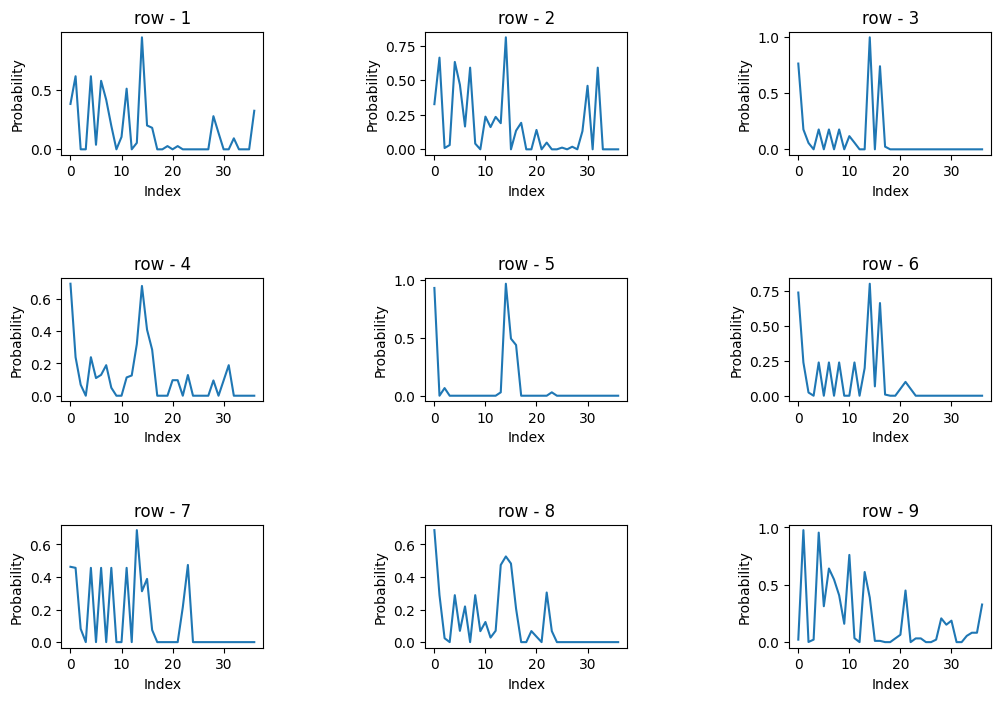

In [85]:
plt.figure(figsize=(12,8))
for i in range(9):
    ax=plt.subplot(3,3,i+1)
    ax.set_title(f'row - {i+1}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Probability')
    ax.plot(train_sol.iloc[i,1:].values)
    
    plt.subplots_adjust(wspace=0.8, hspace= 1) #to adjust the   #spacing between the subplots

In [86]:
train_sol_copy = train_sol.copy()
train_sol_copy.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027227,0.000000,0.027227,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.0,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.000000,0.0,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.0,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.0,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.0,0.000000,0.096119,0.096119,0.000000,0.128159,0.0,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029383,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [87]:
# dropping the ID
train_sol_copy.drop('GalaxyID' , axis=1, inplace=True)

# code block to compare probabilities close to each other:
no_of_galaxies_with_more_than_one_prominent_feature = 0
for i in range(len(train_sol_copy)):
    if train_sol_copy.iloc[i,:].sort_values(ascending=False)[0] - train_sol_copy.iloc[i,:].sort_values(ascending=False)[1] <= 0.1:
        no_of_galaxies_with_more_than_one_prominent_feature += 1

# getting the output:
print(f"No of galaxies having more than one prominent feature : {no_of_galaxies_with_more_than_one_prominent_feature}")

# percentage of images having more than one prominent feature 
print(f"Percentage of galaxies having more than one prominent_feature : {no_of_galaxies_with_more_than_one_prominent_feature/len(train_sol_copy):.2f} %")

No of galaxies having more than one prominent feature : 29064
Percentage of galaxies having more than one prominent_feature : 0.47 %


In [88]:
categorical_max = []  
for i in range(len(train_sol_copy)):
    categorical_max.append(train_sol_copy.columns[list(train_sol_copy.iloc[i].values).index(max(list(train_sol_copy.iloc[i].values)))])

In [89]:
categorical_max = pd.Series(categorical_max)
categorical_max.rename('categorical_max', inplace=True)

0        Class6.2
1        Class6.2
2        Class6.2
3        Class1.1
4        Class6.2
           ...   
61573    Class6.2
61574    Class1.1
61575    Class6.1
61576    Class1.2
61577    Class1.1
Name: categorical_max, Length: 61578, dtype: object

In [90]:
new_file = pd.concat([train_sol,categorical_max],axis=1)
new_file.columns

Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6', 'categorical_max'],
      dtype='object')

In [91]:
galaxy_and_category = new_file[['GalaxyID','categorical_max']]
galaxy_and_category.head()

,GalaxyID,categorical_max
0,100008.jpg,Class6.2
1,100023.jpg,Class6.2
2,100053.jpg,Class6.2
3,100078.jpg,Class1.1
4,100090.jpg,Class6.2


In [92]:
galaxy_and_category['categorical_max'].value_counts()

categorical_max
Class6.2    36706
Class1.2    15940
Class1.1     5449
Class6.1     3470
Class1.3       13
Name: count, dtype: int64

In [93]:
from transformers import AutoModelForImageClassification, AutoProcessor
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
from PIL import Image
from collections import Counter

In [94]:
# Filter DataFrame to keep only the top two classes by frequency
top_two_classes = galaxy_and_category['categorical_max'].value_counts().index[:2]
filtered_df = galaxy_and_category[galaxy_and_category['categorical_max'].isin(top_two_classes)].reset_index(drop=True)

print(filtered_df['categorical_max'].value_counts())
filtered_df

categorical_max
Class6.2    36706
Class1.2    15940
Name: count, dtype: int64


,GalaxyID,categorical_max
0,100008.jpg,Class6.2
1,100023.jpg,Class6.2
2,100053.jpg,Class6.2
3,100090.jpg,Class6.2
4,100122.jpg,Class6.2
...,...,...
52641,999890.jpg,Class6.2
52642,999900.jpg,Class6.2
52643,999936.jpg,Class6.2
52644,999948.jpg,Class6.2


# Converting Class into Label

In [95]:
# Map the two classes to 0 and 1 for binary classification
class_to_idx = {class_name: idx for idx, class_name in enumerate(top_two_classes)}
filtered_df['label'] = filtered_df['categorical_max'].map(class_to_idx)
filtered_df

,GalaxyID,categorical_max,label
0,100008.jpg,Class6.2,0
1,100023.jpg,Class6.2,0
2,100053.jpg,Class6.2,0
3,100090.jpg,Class6.2,0
4,100122.jpg,Class6.2,0
...,...,...,...
52641,999890.jpg,Class6.2,0
52642,999900.jpg,Class6.2,0
52643,999936.jpg,Class6.2,0
52644,999948.jpg,Class6.2,0


# Transformationing the datasets

In [96]:
# Transformations for training and validation datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Basic transformation for test dataset
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Making GalaxyDataClass

In [97]:
# Define GalaxyDataset class with optional transform
class GalaxyDataset(Dataset):
    def __init__(self, dataframe, images_dir, transform=None):
        self.dataframe = dataframe
        self.images_dir = images_dir
        self.transform = transform  # Apply transform if provided

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.images_dir, self.dataframe.iloc[idx]["GalaxyID"])
        image = Image.open(img_name).convert("RGB")

        if self.transform:
            image = self.transform(image)

        if "label" in self.dataframe.columns:  # Check if labels are present
            label = self.dataframe.iloc[idx]["label"]
            return image, label
        else:  # Test data has no labels
            return image  # Return only the image for test dataset

# Defining the Data laoder for train , valid, test 

In [123]:
# Load the dataframe (assuming `filtered_df` is already available)
# Split into train (80%), validation (10%), and test (10%) sets
train_val_df, test_df = train_test_split(filtered_df, test_size=0.3, random_state=42, stratify=filtered_df["label"])
train_df, valid_df = train_test_split(train_val_df, test_size=0.1, random_state=42, stratify=train_val_df["label"])

# Load test images (no labels required)
test_images = pd.DataFrame({"GalaxyID": os.listdir(test_images_path)})

# Create PyTorch Datasets
train_dataset = GalaxyDataset(train_df, train_images_path, transform=transform)
valid_dataset = GalaxyDataset(valid_df, train_images_path, transform=transform)
test_dataset = GalaxyDataset(test_df, train_images_path, transform=test_transform)

# DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Calculate steps per epoch
train_steps = len(train_loader)
val_steps = len(valid_loader)
test_steps = len(test_loader)

print("Number of training batches:", train_steps)
print("Number of validation batches:", val_steps)
print("Number of test batches:", test_steps)

# Check sample output from train and test loaders
for images, labels in train_loader:
    print("Train batch - images shape:", images.shape)
    print("Train batch - labels shape:", labels.shape)
    break

Number of training batches: 1037
Number of validation batches: 116
Number of test batches: 494
Train batch - images shape: torch.Size([32, 3, 224, 224])
Train batch - labels shape: torch.Size([32])


# Evaluating the Resnet Directly on Test dataset

In [124]:
import torch
from transformers import ResNetForImageClassification
from sklearn.metrics import accuracy_score
from torch import nn, optim
from tqdm import tqdm  # Progress bar
from transformers.optimization import get_scheduler

# Load the pre-trained ResNet-50 model from Hugging Face
model = ResNetForImageClassification.from_pretrained(
    "microsoft/resnet-50", 
    num_labels=2, 
    ignore_mismatched_sizes=True
)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

# Set the model to evaluation mode
model.eval()

# Placeholder for predictions and ground-truth labels
all_preds = []
all_labels = []

Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [125]:
# Disable gradient computation for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(model.device), labels.to(model.device)
        
        # Forward pass
        outputs = model(images).logits
        
        # Predicted class (highest logit)
        preds = torch.argmax(outputs, dim=1)
        
        # Append predictions and labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6894


# Fine Tunning the Resnet on Train Dataset 

In [126]:
# Data augmentation and preprocessing for training
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

valid_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [127]:
# Datasets and Dataloaders
train_dataset = GalaxyDataset(train_df, train_images_path, transform=train_transform)
valid_dataset = GalaxyDataset(valid_df, train_images_path, transform=valid_transform)
test_dataset = GalaxyDataset(test_df, train_images_path, transform=valid_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [131]:
# Optimizer and Scheduler
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
num_training_steps = len(train_loader) *7   
lr_scheduler = get_scheduler("cosine", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Define loss function
criterion = nn.CrossEntropyLoss()

In [132]:
# Training and Validation
best_val_accuracy = 0

print("Starting training...")
for epoch in range(7):
    model.train()
    train_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1} Training", leave=False)
    
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images).logits
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        progress_bar.set_postfix({"Loss": train_loss / len(train_loader)})

    # Validation
    model.eval()
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            preds = torch.argmax(outputs, dim=1)

            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f"Epoch {epoch + 1}: Train Loss = {train_loss / len(train_loader):.4f}, Validation Accuracy = {val_accuracy:.4f}")

    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model!")

Starting training...


Epoch 1: Train Loss = 0.3941, Validation Accuracy = 0.8657
Saved Best Model!


Epoch 2: Train Loss = 0.2778, Validation Accuracy = 0.8787
Saved Best Model!


Epoch 3: Train Loss = 0.2290, Validation Accuracy = 0.8817
Saved Best Model!


Epoch 4: Train Loss = 0.1848, Validation Accuracy = 0.8752


Epoch 5: Train Loss = 0.1339, Validation Accuracy = 0.8608


Epoch 6: Train Loss = 0.0935, Validation Accuracy = 0.8719


Epoch 7: Train Loss = 0.0650, Validation Accuracy = 0.8627


In [133]:
# Load the best model for testing
model.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [134]:
model.eval()

# Test Evaluation
test_preds = []
test_labels = []
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing", leave=False):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        preds = torch.argmax(outputs, dim=1)

        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8852


# FineTunning Using LORA

In [135]:
!pip install loralib
!pip install peft
from peft import LoraConfig, get_peft_model, TaskType
import math
import torch.nn.functional as F
from transformers import ResNetModel, AutoConfig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 6.9 MB/s eta 0:00:0000:01


In [162]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import loralib as lora  # LoRA library

In [163]:
# Define a custom LoRA layer
class LoRALayer(nn.Module):
    def __init__(self, in_features, out_features, rank=8):
        super(LoRALayer, self).__init__()
        self.rank = rank
        
        # Low-rank matrices
        self.lora_A = nn.Parameter(torch.randn(in_features, rank) * 0.01)
        self.lora_B = nn.Parameter(torch.randn(rank, out_features) * 0.01)
        self.bias = nn.Parameter(torch.zeros(out_features))  # Optional bias term

    def forward(self, x):
        return x @ self.lora_A @ self.lora_B + self.bias

# Modify ResNet to include LoRA layers
class ModifiedResNet(nn.Module):
    def __init__(self, base_model, num_classes, rank=8):
        super(ModifiedResNet, self).__init__()
        self.features = nn.Sequential(*list(base_model.children())[:-1])  # Remove fully connected layer
        self.lora_fc = LoRALayer(512, num_classes, rank)  # Replace fully connected layer

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)  # Flatten to feed into LoRA layer
        x = self.lora_fc(x)
        return x

# Load pretrained ResNet
base_resnet = models.resnet18(pretrained=True)

# Freeze all layers except LoRA layers
for param in base_resnet.parameters():
    param.requires_grad = False

num_classes = len(train_df['label'].unique())  # Number of output classes
model = ModifiedResNet(base_resnet, num_classes, rank=8)

# Define loss function, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [164]:
# Training loop (same as above)
def train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs=10):
    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        train_loss = 0.0
        train_correct = 0
        total_samples = 0

        # Training phase
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)

        train_accuracy = train_correct / total_samples
        print(f"Training Loss: {train_loss / total_samples:.4f}, Accuracy: {train_accuracy:.4f}")

        # Validation phase
        model.eval()
        valid_loss = 0.0
        valid_correct = 0
        total_samples = 0

        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                valid_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                valid_correct += (preds == labels).sum().item()
                total_samples += labels.size(0)

        valid_accuracy = valid_correct / total_samples
        print(f"Validation Loss: {valid_loss / total_samples:.4f}, Accuracy: {valid_accuracy:.4f}")

        scheduler.step()

In [166]:
# Evaluation on test dataset (same as above)
def evaluate_model(model, test_loader):
    model.eval()
    test_correct = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            test_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)

    test_accuracy = test_correct / total_samples
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs=10)
evaluate_model(model, test_loader)

Epoch 1/10


100%|██████████| 1037/1037 [02:49<00:00,  6.11it/s]

Training Loss: 0.5456, Accuracy: 0.7256


Validation Loss: 0.5457, Accuracy: 0.7241
Epoch 2/10


100%|██████████| 1037/1037 [02:40<00:00,  6.46it/s]

Training Loss: 0.5339, Accuracy: 0.7278


Validation Loss: 0.5433, Accuracy: 0.7219
Epoch 3/10


100%|██████████| 1037/1037 [02:40<00:00,  6.46it/s]

Training Loss: 0.5301, Accuracy: 0.7311


Validation Loss: 0.5351, Accuracy: 0.7349
Epoch 4/10


100%|██████████| 1037/1037 [02:39<00:00,  6.49it/s]

Training Loss: 0.5271, Accuracy: 0.7345


Validation Loss: 0.5332, Accuracy: 0.7328
Epoch 5/10


100%|██████████| 1037/1037 [02:39<00:00,  6.50it/s]

Training Loss: 0.5250, Accuracy: 0.7374


Validation Loss: 0.5407, Accuracy: 0.7249
Epoch 6/10


100%|██████████| 1037/1037 [02:39<00:00,  6.49it/s]

Training Loss: 0.5243, Accuracy: 0.7365


Validation Loss: 0.5381, Accuracy: 0.7320
Epoch 7/10


100%|██████████| 1037/1037 [02:39<00:00,  6.48it/s]

Training Loss: 0.5243, Accuracy: 0.7371


Validation Loss: 0.5312, Accuracy: 0.7363
Epoch 8/10


100%|██████████| 1037/1037 [02:39<00:00,  6.50it/s]

Training Loss: 0.5236, Accuracy: 0.7389


Validation Loss: 0.5302, Accuracy: 0.7371
Epoch 9/10


100%|██████████| 1037/1037 [02:39<00:00,  6.49it/s]

Training Loss: 0.5225, Accuracy: 0.7384


Validation Loss: 0.5350, Accuracy: 0.7317
Epoch 10/10


100%|██████████| 1037/1037 [02:40<00:00,  6.48it/s]

Training Loss: 0.5147, Accuracy: 0.7441


Validation Loss: 0.5294, Accuracy: 0.7412
Test Accuracy: 0.7393


# Reporting the Accuracy :

In [ ]:
## Test Accuracy on Evaluating pre-trained ResNet Directly: 68.94%
## Test Accuracy Finetuning the Resnet model: 88.52%
## Test Accuracy of the LORA technique on the Resnet model:  73.93 %